In [1]:
using MomentClosure, Catalyst

┌ Info: Precompiling MomentClosure [01a1b25a-ecf0-48c5-ae58-55bfd5393600]
└ @ Base loading.jl:1278


In [2]:
rn = @reaction_network begin
  (c₁/Ω^2), 2X + Y → 3X
  (c₂), X → Y
  (c₃*Ω, c₄), 0 ↔ X
end c₁ c₂ c₃ c₄ Ω

Model ##ReactionSystem#253 with 4 equations
States (2):
  X(t)
  Y(t)
Parameters (5):
  c₁
  c₂
  c₃
  c₄
  Ω

In [3]:
@parameters t, c₁, c₂, c₃, c₄, Ω
@variables X(t), Y(t)

# stoichiometric matrix
S_mat = [ 1 -1  1 -1;
         -1  1  0  0]

# propensity functions
a = [c₁*X*Y*(X-1)/Ω^2, c₂*X, c₃*Ω, c₄*X]

rn2 = ReactionSystemMod(t, [X, Y], [c₁, c₂, c₃, c₄, Ω], a, S_mat)

ReactionSystemMod(t, Term{Real}[X(t), Y(t)], Sym{ModelingToolkit.Parameter{Real}}[c₁, c₂, c₃, c₄, Ω], SymbolicUtils.Mul{Real,Int64,Dict{Any,Number}}[c₁*X(t)*Y(t)*(Ω^-2)*((X(t)) - 1), c₂*X(t), c₃*Ω, c₄*X(t)], [1 -1 1 -1; -1 1 0 0])

In [4]:
get_S_mat(rn)

2×4 Array{Int64,2}:
  1  -1  1  -1
 -1   1  0   0

In [5]:
propensities(rn, combinatoric_ratelaw=false)

4-element Array{SymbolicUtils.Mul{Real,Int64,Dict{Any,Number}},1}:
 c₁*X(t)*Y(t)*(Ω^-2)*((X(t)) - 1)
 c₂*X(t)
 c₃*Ω
 c₄*X(t)

In [6]:
raw_eqs = generate_raw_moment_eqs(rn, 2, combinatoric_ratelaw=false);

In [7]:
using Latexify
exprs = format_moment_eqs(raw_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
\frac{d\mu{_{10}}}{dt} =& c{_3} \Omega + c{_1} \mu{_{21}} \Omega^{-2} - c{_2} \mu{_{10}} - c{_4} \mu{_{10}} - c{_1} \mu{_{11}} \Omega^{-2} \\
\frac{d\mu{_{01}}}{dt} =& c{_2} \mu{_{10}} + c{_1} \mu{_{11}} \Omega^{-2} - c{_1} \mu{_{21}} \Omega^{-2} \\
\frac{d\mu{_{20}}}{dt} =& c{_2} \mu{_{10}} + c{_3} \Omega + c{_4} \mu{_{10}} + 2 c{_1} \mu{_{31}} \Omega^{-2} + 2 c{_3} \Omega \mu{_{10}} - 2 c{_2} \mu{_{20}} - 2 c{_4} \mu{_{20}} - c{_1} \mu{_{11}} \Omega^{-2} - c{_1} \mu{_{21}} \Omega^{-2} \\
\frac{d\mu{_{11}}}{dt} =& c{_2} \mu{_{20}} + c{_1} \mu{_{11}} \Omega^{-2} + c{_1} \mu{_{22}} \Omega^{-2} + c{_3} \Omega \mu{_{01}} - c{_2} \mu{_{10}} - c{_2} \mu{_{11}} - c{_4} \mu{_{11}} - c{_1} \mu{_{12}} \Omega^{-2} - c{_1} \mu{_{31}} \Omega^{-2} \\
\frac{d\mu{_{21}}}{dt} =& c{_2} \mu{_{10}} + c{_1} \mu{_{21}} \Omega^{-2} + 2 c{_2} \mu{_{11}} + 2 c{_1} \mu{_{12}} \Omega^{-2} - c{_1} \mu{_{11}} \Omega^{-2} - 2 c{_1} \mu{_{22}} \Omega^{-2}
\end{align}
"

In [8]:
central_eqs = generate_central_moment_eqs(rn, 2, combinatoric_ratelaw=false);

In [9]:
exprs = format_moment_eqs(central_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
\frac{d\mu{_{10}}}{dt} =& c{_3} \Omega + c{_1} M{_{21}} \Omega^{-2} + c{_1} M{_{20}} \mu{_{01}} \Omega^{-2} + c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} + 2 c{_1} M{_{11}} \mu{_{10}} \Omega^{-2} - c{_2} \mu{_{10}} - c{_4} \mu{_{10}} - c{_1} M{_{11}} \Omega^{-2} - c{_1} \mu{_{01}} \mu{_{10}} \Omega^{-2} \\
\frac{d\mu{_{01}}}{dt} =& c{_2} \mu{_{10}} + c{_1} M{_{11}} \Omega^{-2} + c{_1} \mu{_{01}} \mu{_{10}} \Omega^{-2} - c{_1} M{_{21}} \Omega^{-2} - 2 c{_1} M{_{11}} \mu{_{10}} \Omega^{-2} - c{_1} M{_{20}} \mu{_{01}} \Omega^{-2} - c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} \\
\frac{dM{_{20}}}{dt} =& c{_2} \mu{_{10}} + c{_3} \Omega + c{_4} \mu{_{10}} + 2 c{_1} M{_{31}} \Omega^{-2} + c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} + 2 c{_1} M{_{11}} \Omega^{-2} \mu{_{10}}^{2} + 4 c{_1} M{_{21}} \mu{_{10}} \Omega^{-2} + 2 c{_1} M{_{30}} \mu{_{01}} \Omega^{-2} + 4 c{_1} M{_{20}} \mu{_{01}} \mu{_{10}} \Omega^{-2} - 2 c{_2} M{_{20}} - 2 c{_4} M{_{20}} - c{_1} M{_{11}} \Omega^{-2} 

In [10]:
closed_raw_eqs = moment_closure(raw_eqs, "normal");

In [11]:
exprs = format_moment_eqs(closed_raw_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
\frac{d\mu{_{10}}}{dt} =& c{_3} \Omega + c{_1} \mu{_{01}} \mu{_{20}} \Omega^{-2} + 2 c{_1} \mu{_{10}} \mu{_{11}} \Omega^{-2} - c{_2} \mu{_{10}} - c{_4} \mu{_{10}} - c{_1} \mu{_{11}} \Omega^{-2} - 2 c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} \\
\frac{d\mu{_{01}}}{dt} =& c{_2} \mu{_{10}} + c{_1} \mu{_{11}} \Omega^{-2} + 2 c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} - c{_1} \mu{_{01}} \mu{_{20}} \Omega^{-2} - 2 c{_1} \mu{_{10}} \mu{_{11}} \Omega^{-2} \\
\frac{d\mu{_{20}}}{dt} =& c{_2} \mu{_{10}} + c{_3} \Omega + c{_4} \mu{_{10}} + 2 c{_3} \Omega \mu{_{10}} + 2 c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} + 6 c{_1} \mu{_{11}} \mu{_{20}} \Omega^{-2} - 2 c{_2} \mu{_{20}} - 2 c{_4} \mu{_{20}} - c{_1} \mu{_{11}} \Omega^{-2} - c{_1} \mu{_{01}} \mu{_{20}} \Omega^{-2} - 4 c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{3} - 2 c{_1} \mu{_{10}} \mu{_{11}} \Omega^{-2} \\
\frac{d\mu{_{11}}}{dt} =& c{_2} \mu{_{20}} + c{_1} \mu{_{11}} \Omega^{-2} + c{_3} \Omega \mu{_{01}} + c{_1} \mu{_{02}} \m

In [12]:
exprs = format_closure(closed_raw_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
\mu{_{03}} =& 3 \mu{_{01}} \mu{_{02}} - 2 \mu{_{01}}^{3} \\
\mu{_{30}} =& 3 \mu{_{10}} \mu{_{20}} - 2 \mu{_{10}}^{3} \\
\mu{_{22}} =& \mu{_{02}} \mu{_{20}} + 2 \mu{_{11}}^{2} + 2 \mu{_{01}} \mu{_{21}} + 2 \mu{_{10}} \mu{_{12}} + 6 \mu{_{01}}^{2} \mu{_{10}}^{2} - 2 \mu{_{02}} \mu{_{10}}^{2} - 2 \mu{_{20}} \mu{_{01}}^{2} - 8 \mu{_{01}} \mu{_{10}} \mu{_{11}} \\
\mu{_{04}} =& 6 \mu{_{01}}^{4} + 3 \mu{_{02}}^{2} + 4 \mu{_{01}} \mu{_{03}} - 12 \mu{_{02}} \mu{_{01}}^{2} \\
\mu{_{13}} =& \mu{_{03}} \mu{_{10}} + 3 \mu{_{01}} \mu{_{12}} + 3 \mu{_{02}} \mu{_{11}} + 6 \mu{_{10}} \mu{_{01}}^{3} - 6 \mu{_{11}} \mu{_{01}}^{2} - 6 \mu{_{01}} \mu{_{02}} \mu{_{10}} \\
\mu{_{21}} =& \mu{_{01}} \mu{_{20}} + 2 \mu{_{10}} \mu{_{11}} - 2 \mu{_{01}} \mu{_{10}}^{2} \\
\mu{_{31}} =& \mu{_{01}} \mu{_{30}} + 6 \mu{_{01}} \mu{_{10}}^{3} + 3 \mu{_{10}} \mu{_{21}} + 3 \mu{_{11}} \mu{_{20}} - 6 \mu{_{11}} \mu{_{10}}^{2} - 6 \mu{_{01}} \mu{_{10}} \mu{_{20}} \\
\mu{_{12}} =& \mu{_{02}} \mu{_{10}} + 2 \m

In [13]:
closed_central_eqs = moment_closure(central_eqs, "normal");

In [14]:
exprs = format_moment_eqs(closed_central_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
\frac{d\mu{_{10}}}{dt} =& c{_3} \Omega + c{_1} M{_{20}} \mu{_{01}} \Omega^{-2} + c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} + 2 c{_1} M{_{11}} \mu{_{10}} \Omega^{-2} - c{_2} \mu{_{10}} - c{_4} \mu{_{10}} - c{_1} M{_{11}} \Omega^{-2} - c{_1} \mu{_{01}} \mu{_{10}} \Omega^{-2} \\
\frac{d\mu{_{01}}}{dt} =& c{_2} \mu{_{10}} + c{_1} M{_{11}} \Omega^{-2} + c{_1} \mu{_{01}} \mu{_{10}} \Omega^{-2} - 2 c{_1} M{_{11}} \mu{_{10}} \Omega^{-2} - c{_1} M{_{20}} \mu{_{01}} \Omega^{-2} - c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} \\
\frac{dM{_{20}}}{dt} =& c{_2} \mu{_{10}} + c{_3} \Omega + c{_4} \mu{_{10}} + c{_1} \mu{_{01}} \Omega^{-2} \mu{_{10}}^{2} + 6 c{_1} M{_{11}} M{_{20}} \Omega^{-2} + 2 c{_1} M{_{11}} \Omega^{-2} \mu{_{10}}^{2} + 4 c{_1} M{_{20}} \mu{_{01}} \mu{_{10}} \Omega^{-2} - 2 c{_2} M{_{20}} - 2 c{_4} M{_{20}} - c{_1} M{_{11}} \Omega^{-2} - c{_1} M{_{20}} \mu{_{01}} \Omega^{-2} - c{_1} \mu{_{01}} \mu{_{10}} \Omega^{-2} \\
\frac{dM{_{11}}}{dt} =& c{_2} M{_{20}} + c{_1} M

In [15]:
exprs = format_closure(closed_central_eqs)
latexify(exprs, env=:align, cdot=false)

L"\begin{align}
M{_{40}} =& 3 M{_{20}}^{2} \\
M{_{13}} =& 3 M{_{02}} M{_{11}} \\
M{_{03}} =& 0 \\
M{_{30}} =& 0 \\
M{_{21}} =& 0 \\
M{_{22}} =& M{_{02}} M{_{20}} + 2 M{_{11}}^{2} \\
M{_{12}} =& 0 \\
M{_{31}} =& 3 M{_{11}} M{_{20}} \\
M{_{04}} =& 3 M{_{02}}^{2}
\end{align}
"

In [16]:
using OrdinaryDiffEq

In [17]:
@parameters c₁, c₂, c₃, c₄, Ω
pmap = [c₁ => 0.9, 
        c₂ => 2, 
        c₃ => 1, 
        c₄ => 1, 
        Ω => 100]

5-element Array{Pair{Num,Float64},1}:
 c₁ => 0.9
 c₂ => 2.0
 c₃ => 1.0
 c₄ => 1.0
  Ω => 100.0

In [18]:
p = [0.9, 2, 1, 1, 100]
pmap = Pair.(params(rn), p)

5-element Array{Pair{Sym{ModelingToolkit.Parameter{Real}},Float64},1}:
 c₁ => 0.9
 c₂ => 2.0
 c₃ => 1.0
 c₄ => 1.0
  Ω => 100.0

In [23]:
μ₀ = [0, 0]
u₀map = deterministic_IC(μ₀, closed_raw_eqs)

5-element Array{Pair{Term{Real},Int64},1}:
 μ₁₀(t) => 0
 μ₀₁(t) => 0
 μ₂₀(t) => 0
 μ₁₁(t) => 0
 μ₀₂(t) => 0

In [24]:
tspan = (0., 100.)

@time oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, pmap);

  7.366062 seconds (14.28 M allocations: 746.848 MiB, 3.49% gc time)


In [25]:
using OrdinaryDiffEq
@time sol = solve(oprob, Tsit5(), saveat=0.1);

  8.655981 seconds (22.18 M allocations: 1.178 GiB, 8.93% gc time)


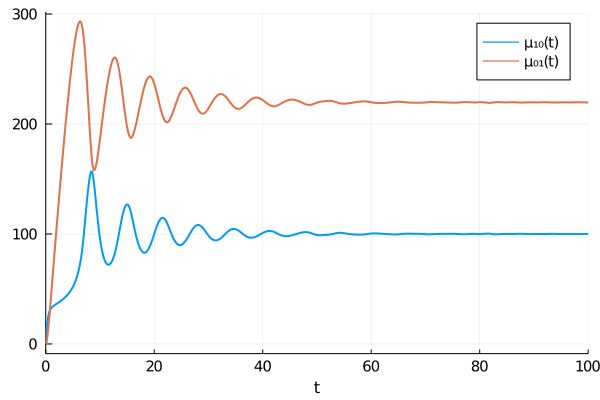

In [26]:
using Plots
plot(sol, vars=(0, [1,2]), lw=2, legendfontsize=10, xtickfontsize=10, ytickfontsize=10)